In [ ]:
import pandas as pd

import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_project/body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


## preprocessing

In [ ]:
#check null value
df.isna().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [ ]:
##convert Alcohol_Consump to numeric
values= df['Alcohol_Consump'].unique()
values

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [ ]:
##convert Alcohol_Consump to numeric
values= df['Food_Between_Meals'].unique()
values

array(['Frequently', 'Sometimes', 'no', 'Always'], dtype=object)

In [ ]:
values= df['Transport'].unique()
values



array(['Public_Transportation', 'Automobile', 'Walking', 'Bike',
       'Motorbike'], dtype=object)

In [ ]:
values= df['Body_Level'].unique()
values


array(['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4'],
      dtype=object)

## Convert Data to numeric

In [ ]:
def preprocessing(df):
  df = df.replace({'Alcohol_Consump': {'no': 0, 'Sometimes': 1,'Frequently': 2,'Always': 3}})
  df = df.replace({'Gender': {'Male': 0, 'Female': 1}})
  df = df.replace({'H_Cal_Consump': {'no': 0, 'yes': 1}})
  df = df.replace({'Smoking': {'no': 0, 'yes': 1}})
  df = df.replace({'Food_Between_Meals': {'no': 0, 'Sometimes': 1,'Frequently': 2,'Always': 3}})
  df = df.replace({'Fam_Hist': {'no': 0, 'yes': 1}})
  df = df.replace({'H_Cal_Burn': {'no': 0, 'yes': 1}})
  df = df.replace({'Transport': {'Public_Transportation': 0, 'Automobile': 1,'Walking': 2,'Bike': 3,'Motorbike': 3}})
  df = df.replace({'Body_Level': {'Body Level 1': 1, 'Body Level 2': 2,'Body Level 3': 3,'Body Level 4': 4}})
  df['BMI']= df['Weight']/(df['Height']*df['Height'])
  return df


df=preprocessing(df)

## visualization

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-23-d256c50dbb7b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'][df['Body_Level']==1 ], bins=15, ax=ax1).set(title='Body Level 1')
<ipython-input-23-d256c50dbb7b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'][df['Body_Level']==2 ], bins=15, ax=ax2).se

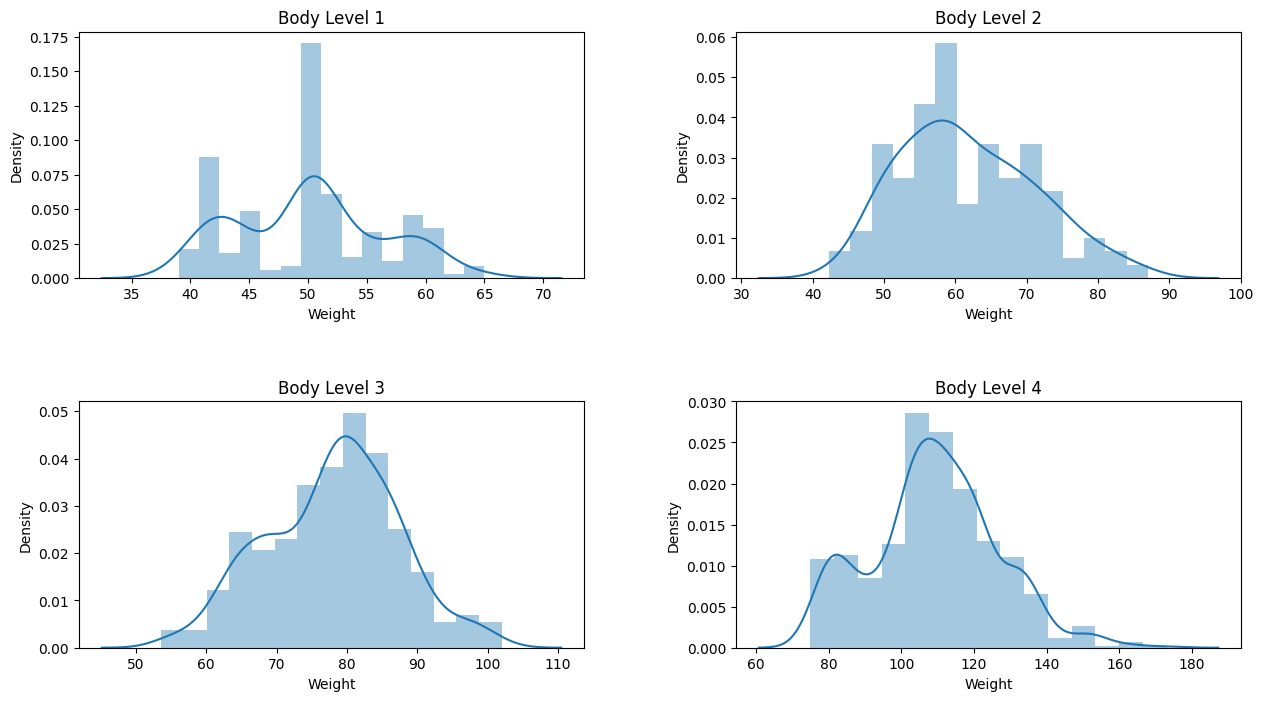

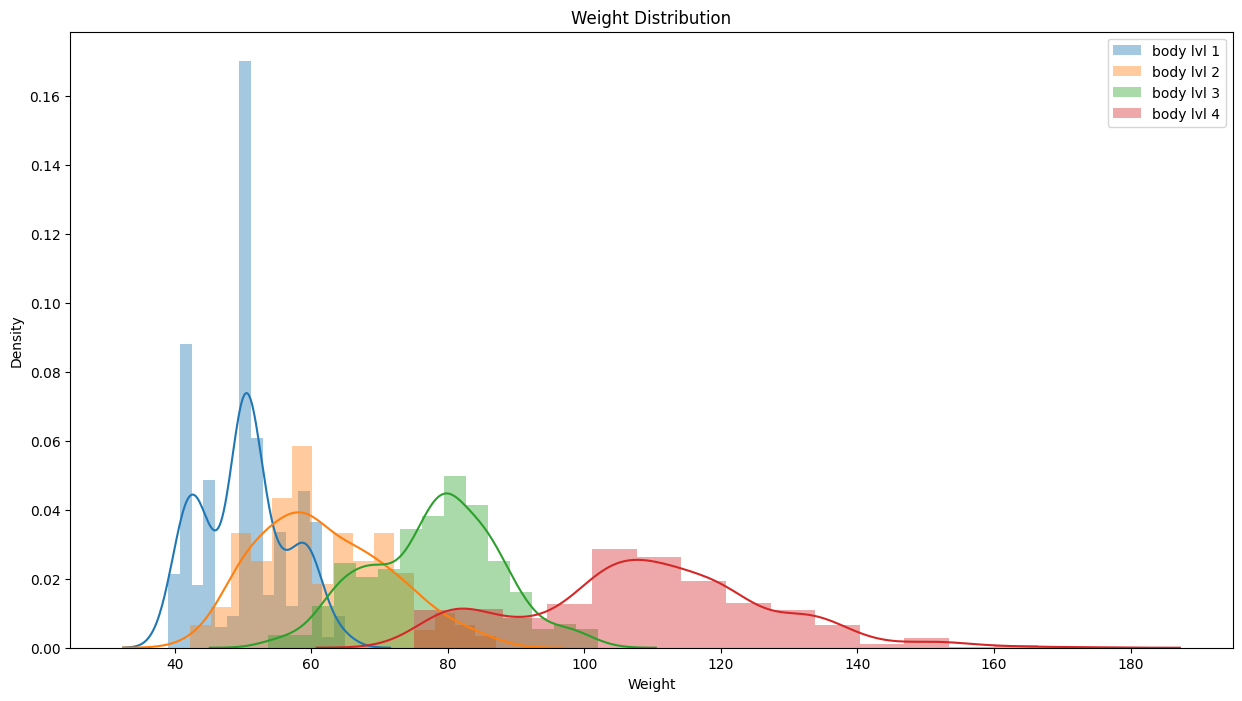

In [ ]:

import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(hspace=.5, wspace=0.3)
sns.distplot(df['Weight'][df['Body_Level']==1 ], bins=15, ax=ax1).set(title='Body Level 1')
sns.distplot(df['Weight'][df['Body_Level']==2 ], bins=15, ax=ax2).set(title='Body Level 2')
sns.distplot(df['Weight'][df['Body_Level']==3 ], bins=15, ax=ax3).set(title='Body Level 3')
sns.distplot(df['Weight'][df['Body_Level']==4 ], bins=15, ax=ax4).set(title='Body Level 4')
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Weight'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df['Weight'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df['Weight'][df['Body_Level']==3 ], label="body lvl 3", bins=15, ax=ax)
sns.distplot(df['Weight'][df['Body_Level']==4 ], label="body lvl 4", bins=15, ax=ax).set(title="Weight Distribution")
plt.legend()

<ipython-input-27-37de234b5c1d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
<ipython-input-27-37de234b5c1d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=

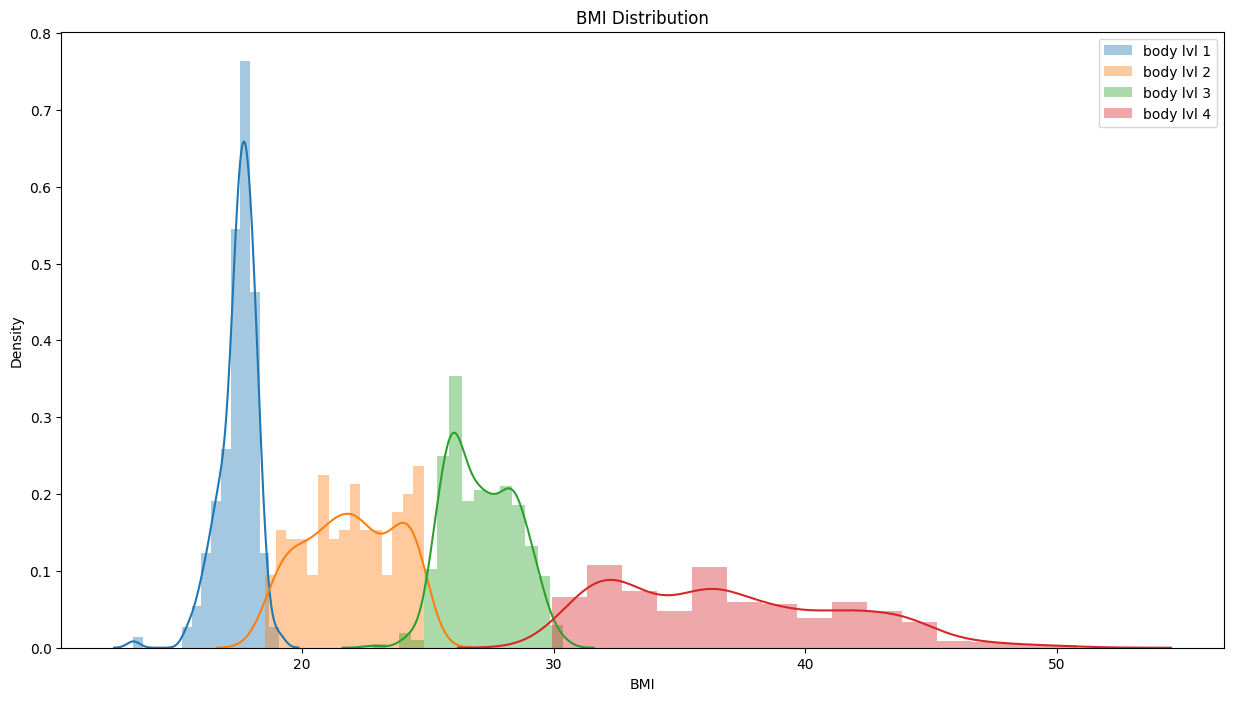

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
# sns.distplot(df['BMI'][df['Body_Level']==1 ], bins=15, ax=ax1)
# sns.distplot(df['BMI'][df['Body_Level']==2 ], bins=15, ax=ax2)
# sns.distplot(df['BMI'][df['Body_Level']==3 ], bins=15, ax=ax3)
# sns.distplot(df['BMI'][df['Body_Level']==4 ], bins=15, ax=ax4)
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['BMI'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df['BMI'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df['BMI'][df['Body_Level']==3 ], label="body lvl 3", bins=15, ax=ax)
sns.distplot(df['BMI'][df['Body_Level']==4 ], label="body lvl 4", bins=15, ax=ax).set(title="BMI Distribution")
plt.legend()

<ipython-input-28-a63b7b0f8f1a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fam_Hist'][df['Body_Level']==1 ], bins=15, ax=ax1).set(title='Body Level 1')
<ipython-input-28-a63b7b0f8f1a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fam_Hist'][df['Body_Level']==2 ], bins=15, ax=ax2

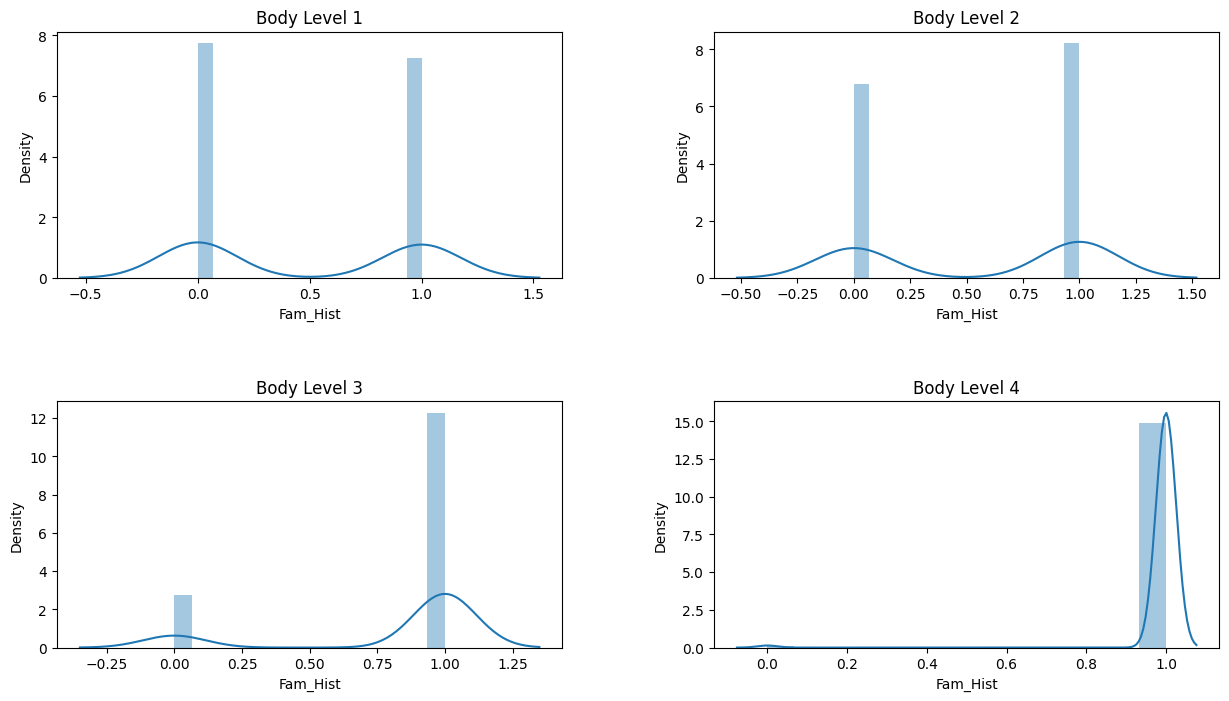

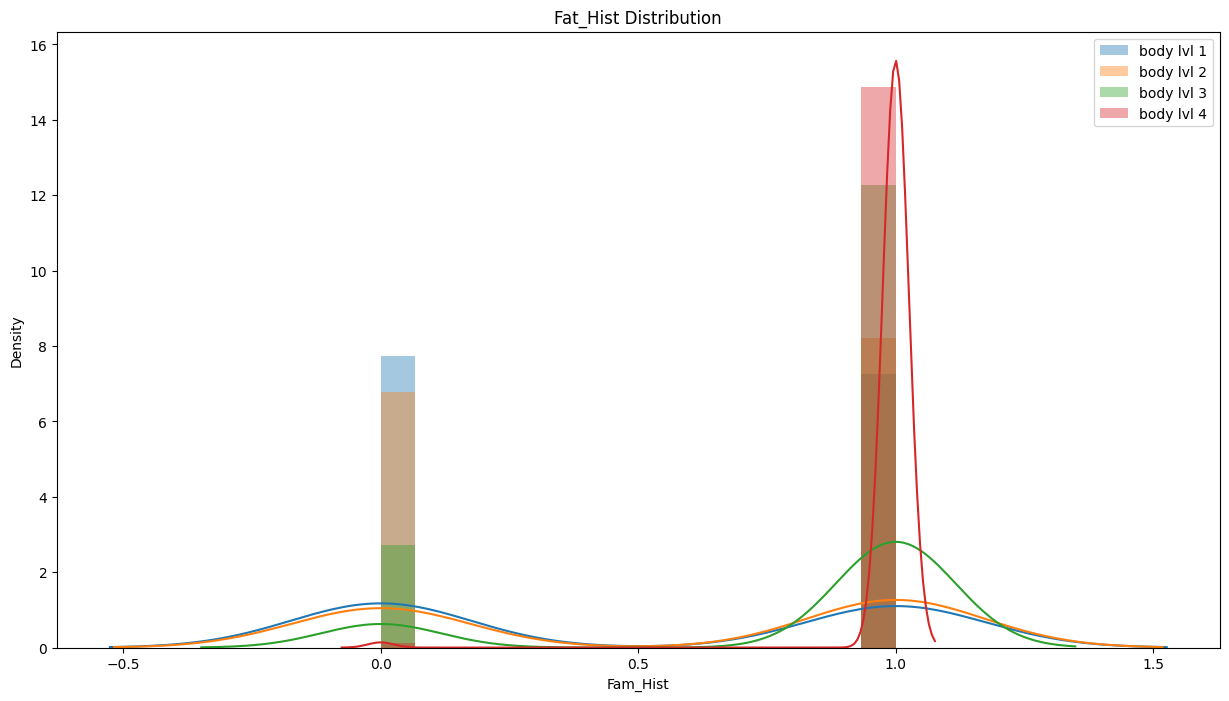

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(hspace=.5, wspace=0.3)
sns.distplot(df['Fam_Hist'][df['Body_Level']==1 ], bins=15, ax=ax1).set(title='Body Level 1')
sns.distplot(df['Fam_Hist'][df['Body_Level']==2 ], bins=15, ax=ax2).set(title='Body Level 2')
sns.distplot(df['Fam_Hist'][df['Body_Level']==3 ], bins=15, ax=ax3).set(title='Body Level 3')
sns.distplot(df['Fam_Hist'][df['Body_Level']==4 ], bins=15, ax=ax4).set(title='Body Level 4')
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Fam_Hist'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df['Fam_Hist'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df['Fam_Hist'][df['Body_Level']==3 ], label="body lvl 3", bins=15, ax=ax)
sns.distplot(df['Fam_Hist'][df['Body_Level']==4 ], label="body lvl 4", bins=15, ax=ax).set(title='Fat_Hist Distribution')
plt.legend()

<ipython-input-29-054e6f3ac227>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Phys_Act'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
<ipython-input-29-054e6f3ac227>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Phys_Act'][df['Body_Level']==2 ], label="body lvl 2", bi

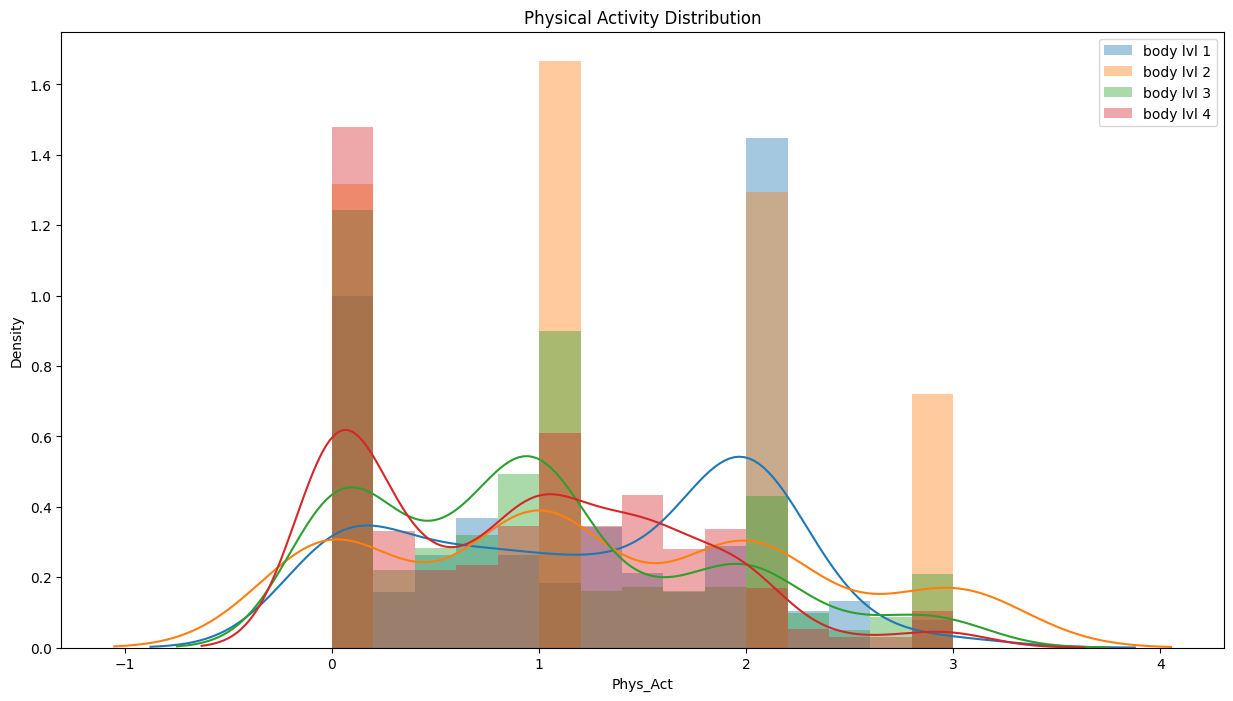

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
# sns.distplot(df['Phys_Act'][df['Body_Level']==1 ], bins=15, ax=ax1)
# sns.distplot(df['Phys_Act'][df['Body_Level']==2 ], bins=15, ax=ax2)
# sns.distplot(df['Phys_Act'][df['Body_Level']==3 ], bins=15, ax=ax3)
# sns.distplot(df['Phys_Act'][df['Body_Level']==4 ], bins=15, ax=ax4)
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Phys_Act'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df['Phys_Act'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df['Phys_Act'][df['Body_Level']==3 ], label="body lvl 3", bins=15, ax=ax)
sns.distplot(df['Phys_Act'][df['Body_Level']==4 ], label="body lvl 4", bins=15, ax=ax).set(title='Physical Activity Distribution')
plt.legend()

<ipython-input-30-05af18380293>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
<ipython-input-30-05af18380293>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=

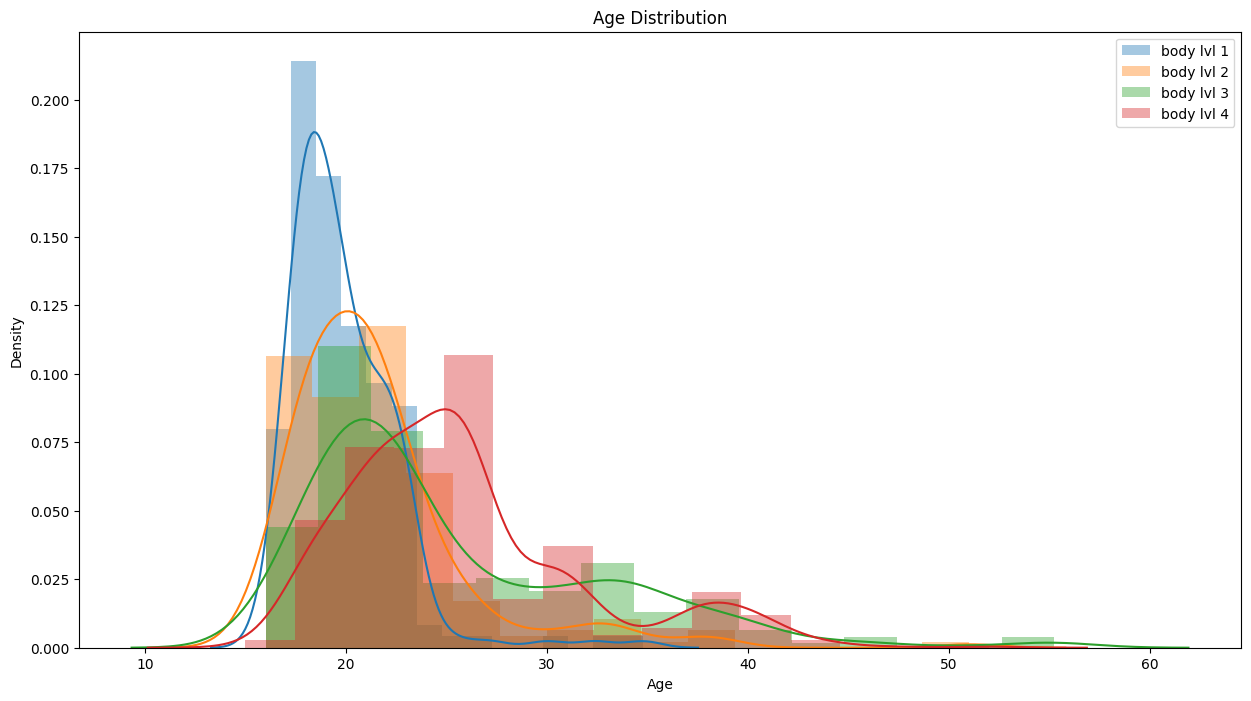

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
# sns.distplot(df['Weight'][df['Body_Level']==1 ], bins=15, ax=ax1)
# sns.distplot(df['Weight'][df['Body_Level']==2 ], bins=15, ax=ax2)
# sns.distplot(df['Weight'][df['Body_Level']==3 ], bins=15, ax=ax3)
# sns.distplot(df['Weight'][df['Body_Level']==4 ], bins=15, ax=ax4)
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Age'][df['Body_Level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df['Age'][df['Body_Level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df['Age'][df['Body_Level']==3 ], label="body lvl 3", bins=15, ax=ax)
sns.distplot(df['Age'][df['Body_Level']==4 ], label="body lvl 4", bins=15, ax=ax).set(title='Age Distribution')
plt.legend()

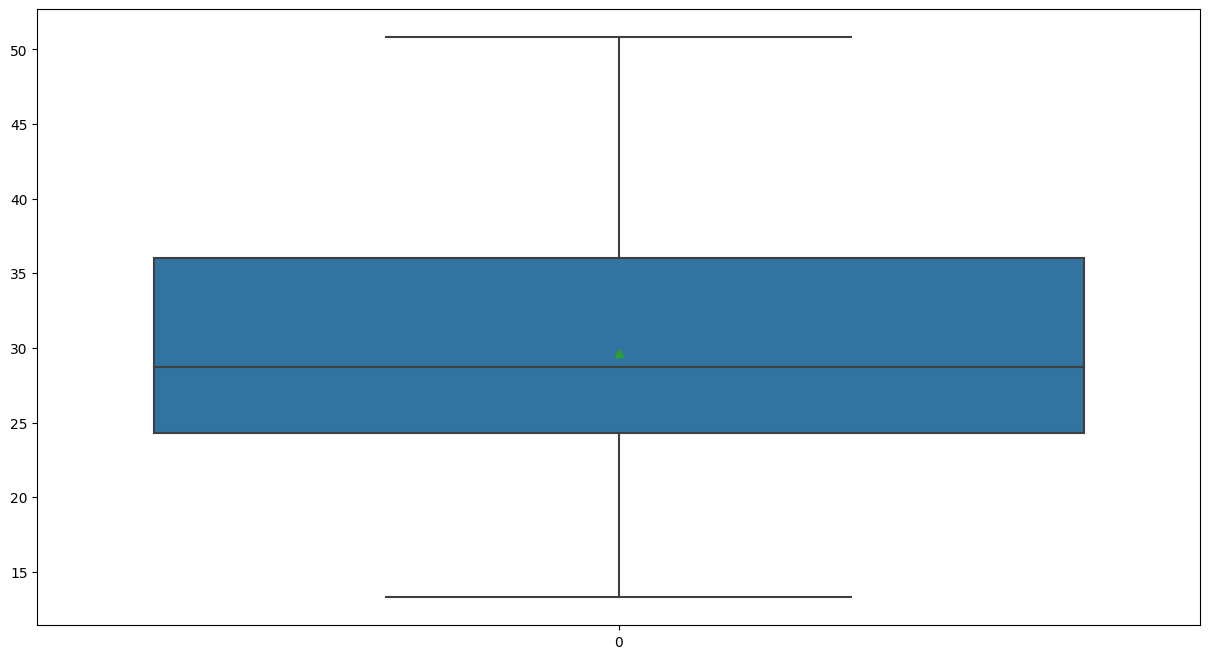

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

box_plot = sns.boxplot( df['BMI'], showmeans=True, ax=ax)

## balancing data

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=190 (12.864%)
Class=2, n=201 (13.609%)
Class=3, n=406 (27.488%)
Class=4, n=680 (46.039%)


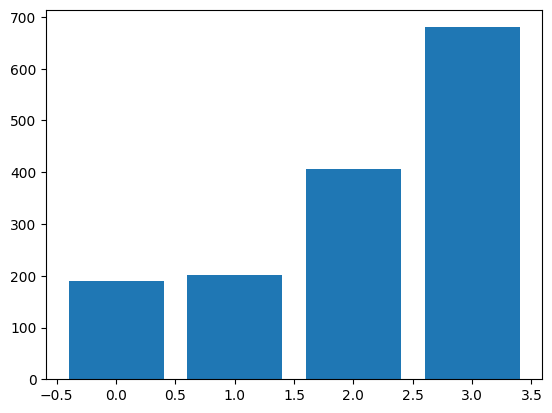

In [ ]:
y = LabelEncoder().fit_transform(df['Body_Level'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k+1, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [ ]:
from imblearn.over_sampling import SMOTE
import imblearn

Class=1, n=680 (25.000%)
Class=2, n=680 (25.000%)
Class=3, n=680 (25.000%)
Class=4, n=680 (25.000%)


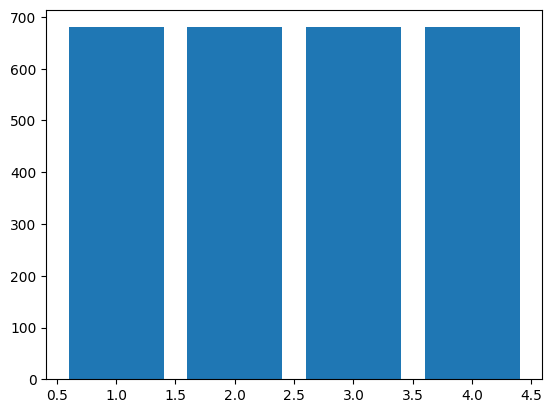

In [ ]:
# transform the dataset
oversample = SMOTE()
y=df['Body_Level']
X=df.loc[:, df.columns != 'Body_Level']
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## features 

<Axes: >

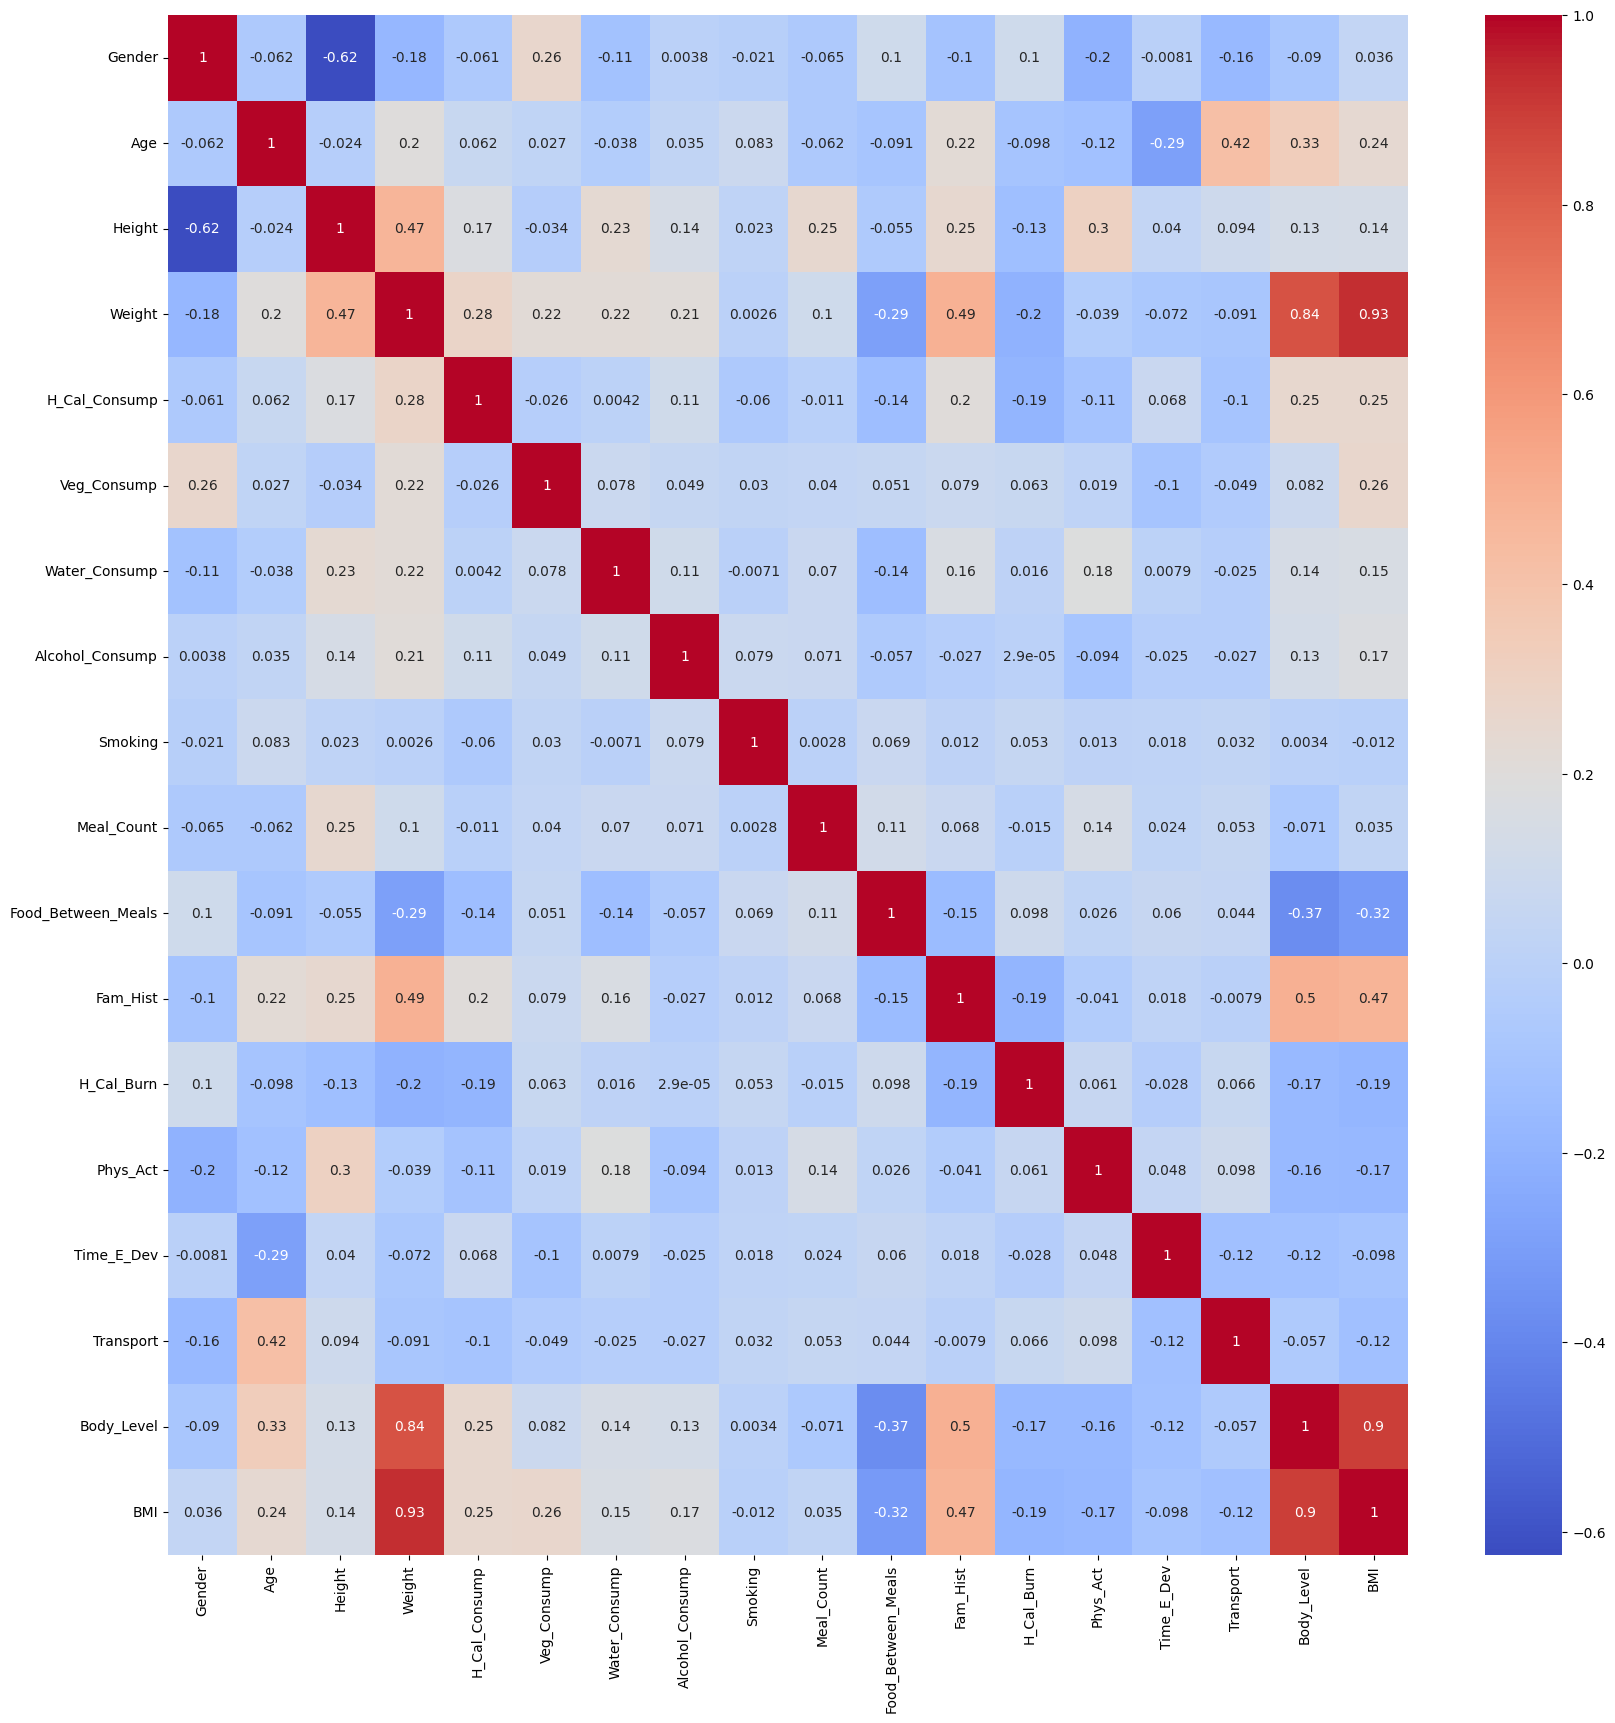

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:

Gender = np.corrcoef(X['Gender'], y)
Age = np.corrcoef(X['Age'], y)
Weight	 = np.corrcoef(X['Weight'], y)
Height		 = np.corrcoef(X['Height'], y)
Fam_Hist=BMI = np.corrcoef(X['Fam_Hist'], y)
Phys_Act=BMI = np.corrcoef(X['Phys_Act'], y)
Food_Between_Meals=np.corrcoef(X['Food_Between_Meals'],y)	
Transport=np.corrcoef(X['Transport'],y)	
Meal_Count=np.corrcoef(X['Meal_Count'], y)	
Water_Consump=np.corrcoef(X['Water_Consump'], y)
H_Cal_Burn=np.corrcoef(X['H_Cal_Burn'],y)	

BMI=np.corrcoef(X['BMI'],y)	
print('Gender  ',Gender[0,1])
print('Age  ',Age[0,1])
print('Weight	  ',Weight[0,1])
print('Height	  ',Height[0,1])
print('Fam_Hist  ',Fam_Hist[0,1])
print('Phys_Act  ',Phys_Act[0,1])
print('Food_Between_Meals  ',Food_Between_Meals[0,1])
print('Transport  ',Transport[0,1])
print('Meal_Count  ',Meal_Count[0,1])
print('Water_Consump  ',Water_Consump[0,1])
print('H_Cal_Burn  ',H_Cal_Burn[0,1])

print('BMI  ',BMI[0,1])

Gender   -0.11542059886362861
Age   0.4055330953796527
Weight	   0.8666296039048396
Height	   0.12208903949027292
Fam_Hist   0.4725800595784774
Phys_Act   -0.13941310837507995
Food_Between_Meals   -0.31633258498187034
Transport   0.043380079979454936
Meal_Count   -0.10195842014495075
Water_Consump   0.17857188833674079
H_Cal_Burn   -0.0815606177686544
BMI   0.9249005078439746


In [ ]:
feature_names = ['BMI','Fam_Hist']
x = X[feature_names]
#y=df['Body_Level']


In [ ]:
weights = [0.9, 0.5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2,shuffle=True,random_state=0)

## classification

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## logistic regression

In [ ]:

log_reg_under = LogisticRegression()

log_reg_under.fit(X_train, y_train)

y_pred_log_under = log_reg_under.predict(X_val)

print(classification_report(y_val,y_pred_log_under ))


              precision    recall  f1-score   support

           1       0.97      1.00      0.98       122
           2       0.99      0.96      0.98       135
           3       0.99      0.98      0.98       154
           4       0.99      0.99      0.99       133

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_log_under = log_reg_under.predict(X_train)
print(classification_report(y_train,y_pred_log_under ))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       558
           2       0.98      0.99      0.98       545
           3       1.00      0.98      0.99       526
           4       0.99      1.00      1.00       547

    accuracy                           0.99      2176
   macro avg       0.99      0.99      0.99      2176
weighted avg       0.99      0.99      0.99      2176



## SVM

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel = 'linear') 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_val)

print(classification_report(y_val,y_pred ))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       122
           2       0.99      0.99      0.99       135
           3       0.99      0.97      0.98       154
           4       0.99      0.99      0.99       133

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

